In [ ]:
import json

In [ ]:
import datetime

In [ ]:
import pandas as pd

In [ ]:
datastore = pd.read_json('Sarcasm.json', lines='True')

In [ ]:
datastore.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
datastore.shape

(26709, 3)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(oov_token="<oov>")

In [ ]:
tokenizer.fit_on_texts(datastore['headline'])

In [ ]:
word_index = tokenizer.word_index

In [ ]:
sequences = tokenizer.texts_to_sequences(datastore['headline'])

In [ ]:
padded = pad_sequences(sequences, padding='post')

In [ ]:
print(padded[0])

[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


In [ ]:
print(padded.shape)

(26709, 40)


In [ ]:
training_sentences = datastore['headline'][0:23000]
testing_sentences = datastore['headline'][23000: ]

In [ ]:
training_labels = datastore['is_sarcastic'][0:23000]
testing_lables = datastore['is_sarcastic'][23000: ]

In [ ]:
tokenizer = Tokenizer(num_words=23000, oov_token="<oov>")
tokenizer.fit_on_texts(training_sentences)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=100,
                               padding='post', truncating='post')

In [ ]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=100,
                               padding='post', truncating='post')

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(23000, 128, input_length=100),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
path = 'logs/fit' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)

In [ ]:
history = model.fit(training_padded, training_labels, 
                    epochs=30, 
                    validation_data=(testing_padded, testing_lables),
                    callbacks = [tensorboard_callback],
                    verbose=2)

Epoch 1/30
719/719 - 28s - loss: 1.1610e-08 - accuracy: 1.0000 - val_loss: 1.1378 - val_accuracy: 0.8692
Epoch 2/30
719/719 - 28s - loss: 9.4192e-09 - accuracy: 1.0000 - val_loss: 1.1599 - val_accuracy: 0.8692
Epoch 3/30
719/719 - 28s - loss: 6.9003e-09 - accuracy: 1.0000 - val_loss: 1.1762 - val_accuracy: 0.8690
Epoch 4/30
719/719 - 28s - loss: 5.4285e-09 - accuracy: 1.0000 - val_loss: 1.1994 - val_accuracy: 0.8695
Epoch 5/30
719/719 - 28s - loss: 4.2203e-09 - accuracy: 1.0000 - val_loss: 1.2160 - val_accuracy: 0.8698
Epoch 6/30
719/719 - 28s - loss: 3.3284e-09 - accuracy: 1.0000 - val_loss: 1.2241 - val_accuracy: 0.8682
Epoch 7/30
719/719 - 29s - loss: 2.7575e-09 - accuracy: 1.0000 - val_loss: 1.2394 - val_accuracy: 0.8692
Epoch 8/30
719/719 - 29s - loss: 2.3496e-09 - accuracy: 1.0000 - val_loss: 1.2531 - val_accuracy: 0.8695
Epoch 9/30
719/719 - 29s - loss: 2.0562e-09 - accuracy: 1.0000 - val_loss: 1.2723 - val_accuracy: 0.8690
Epoch 10/30
719/719 - 29s - loss: 1.7830e-09 - accuracy

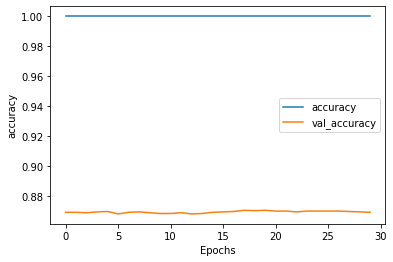

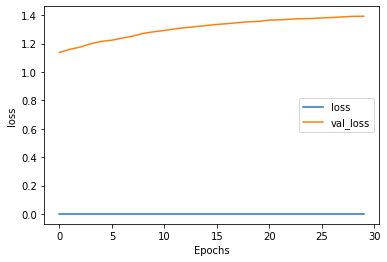

In [ ]:
import matplotlib.pyplot as plt
 
 
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
sentence = ["cows lose their jobs as milk prices drop."]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')
instance = model.predict(padded)
print(instance)

[[0.00023246]]


In [ ]:
import numpy as np

In [ ]:
print(np.log(instance))

[[-8.3668]]
